# Coronavirus Data Analysis
*by: Carolina Migliorelli*

This notebook analyse coronavirus data from different sources and plot some global data and some data from Spain.

__Data Repositories:__

* https://github.com/CSSEGISandData/COVID-19
* https://github.com/datadista/datasets/tree/master/COVID%2019

## Casos Globales

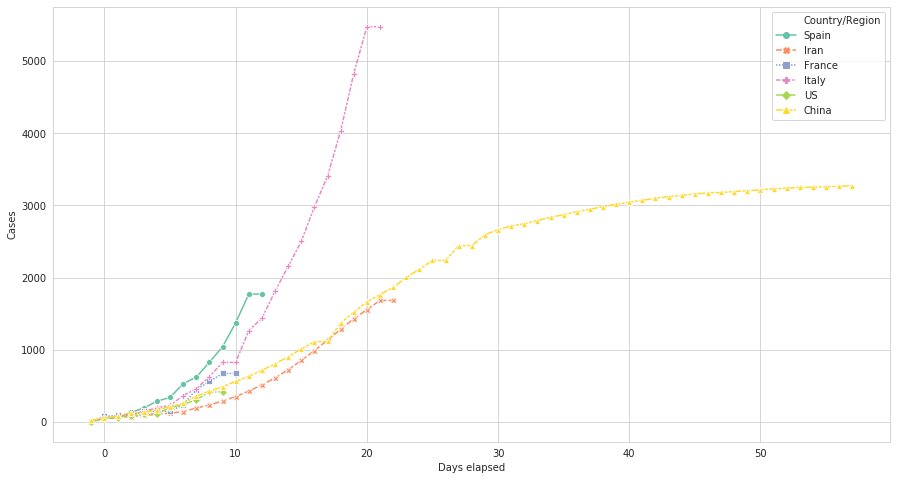

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
## Read Data for Cases, Deaths and Recoveries
ConfirmedCases_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
Deaths_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
Recoveries_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')


### Melt the dateframe into the right shape and set index
def cleandata(df_raw):
    df_cleaned=df_raw.melt(id_vars=['Province/State','Country/Region','Lat','Long'],value_name='Cases',var_name='Date')
    return df_cleaned 

def processdata(df_cleaned):
    df_cleaned['Year'] = pd.DatetimeIndex(df_cleaned['Date']).year
    df_cleaned['Month'] = pd.DatetimeIndex(df_cleaned['Date']).month
    df_cleaned['Day'] = pd.DatetimeIndex(df_cleaned['Date']).day
    df_cleaned = df_cleaned.groupby(['Country/Region','Date','Year','Month','Day']).sum().reset_index()
    df_proc=df_cleaned.sort_values(by=['Cases'])
    return df_proc



# Clean all datasets
ConfirmedCases=cleandata(ConfirmedCases_raw)
Deaths=cleandata(Deaths_raw)
Recoveries=cleandata(Recoveries_raw)

# Select countries to plot
countries = ['Spain','Italy','Iran','US','China','France']

Deaths_aux = Deaths[Deaths['Country/Region'].isin(countries)]
Deaths_aux = processdata(Deaths_aux)

# Define day when the Xth death happened as the day "0"
Deaths_aux['Days elapsed'] = -1
day0 = 50
for country in countries:
    days_elapsed = (len(Deaths_aux[(Deaths_aux['Cases']>day0) & (Deaths_aux['Country/Region']==country)]))
    Deaths_aux['Days elapsed'][(Deaths_aux['Cases']>day0) & (Deaths_aux['Country/Region']==country)]=np.arange(0,days_elapsed)

sns.set_style("whitegrid")
fig_size = (15,8)
fig, ax = plt.subplots(figsize=fig_size)
ax=sns.lineplot(x="Days elapsed", y="Cases",
             hue="Country/Region",
             data=Deaths_aux, palette='Set2',style="Country/Region", markers=True)

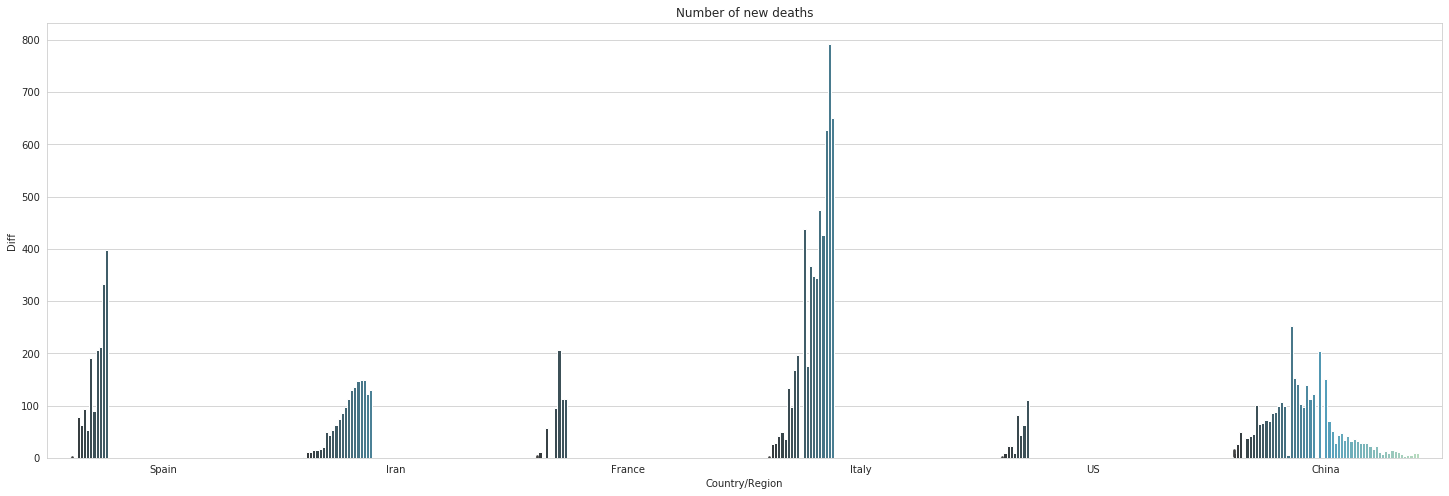

In [122]:
Deaths_aux['Diff'] = 0
for country in countries:
    aux = np.diff(Deaths_aux[Deaths_aux['Country/Region']==country]['Cases'].values)
    val = aux[-1]
    Deaths_aux['Diff'][Deaths_aux['Country/Region']==country] = (np.append(aux,val))    

# Plot the number of cases DAY BY DAY
fig_size = (25,8)
fig, ax = plt.subplots(figsize=fig_size)
sns.barplot(x="Country/Region", y="Diff", data=Deaths_aux,hue='Days elapsed',palette='GnBu_d')
ax.set_title('Number of new deaths')
ax.get_legend().remove()


## Casos de España

In [50]:
spain_cases=pd.read_csv('https://raw.githubusercontent.com/datadista/datasets/master/COVID%2019/ccaa_covid19_casos.csv')
spain_cases = spain_cases.drop(columns=['cod_ine'])
spain_cases = spain_cases.melt(id_vars='CCAA',value_name='Cases',var_name='Date')
spain_cases = spain_cases.rename(columns={'CCAA':'Country/Region'}) 
date = spain_cases['Date'].str.split('-', n = 2, expand = True) 
spain_cases['Year'] = date[0]
spain_cases['Month'] = date[1]
spain_cases['Day'] = date[2]
spain_cases = spain_cases.sort_values(by=['Cases'])
#spain_cases = spain_cases.drop(columns=['Date'])

Text(0.5, 1.0, 'Casos por comunidades. Dia 0:50')

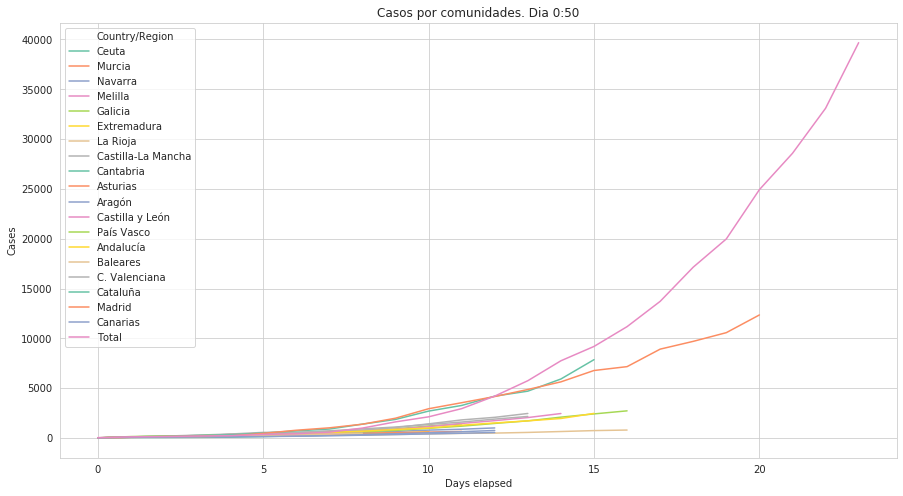

In [51]:
day0 = 50
autonomies = spain_cases['Country/Region'].unique()
spain_cases['Days elapsed'] = 0
for autonomy in autonomies:
    days_elapsed = (len(spain_cases[(spain_cases['Cases']>day0) & (spain_cases['Country/Region']==autonomy)]))
    spain_cases['Days elapsed'][(spain_cases['Cases']>day0) & (spain_cases['Country/Region']==autonomy)]=np.arange(0,days_elapsed)



sns.set_style("whitegrid")
fig_size = (15,8)
fig, ax = plt.subplots(figsize=fig_size)
ax=sns.lineplot(x="Days elapsed", y="Cases",
             hue="Country/Region",
             data=spain_cases, palette='Set2', markers=True)
ax.set_title('Casos por comunidades. Dia 0:' + str(day0))

Text(0.5, 1.0, 'Casos por comunidades más afectadas. Dia 0:50')

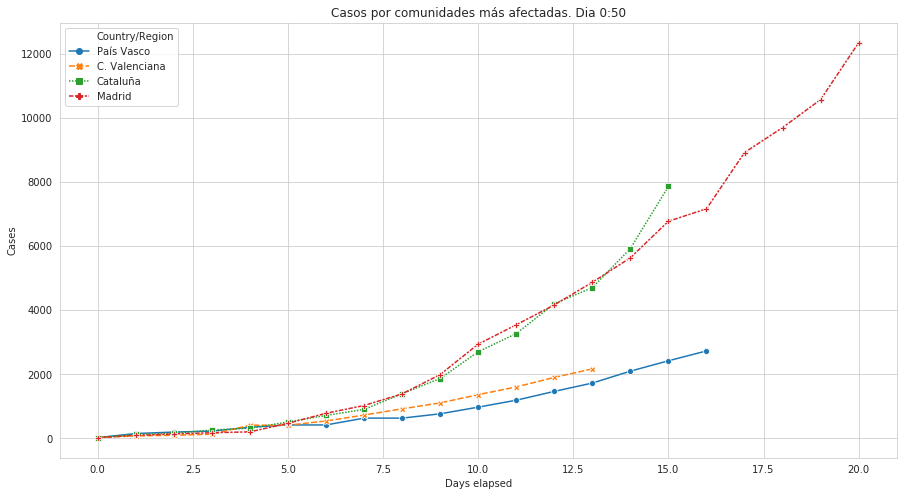

In [52]:
day0 = 50
autonomies = ['Madrid','Cataluña','País Vasco','C. Valenciana']
spain_cases_aux = spain_cases[spain_cases['Country/Region'].isin(autonomies)]
spain_cases_aux['Days elapsed'] = 0
for autonomy in autonomies:
    days_elapsed = (len(spain_cases_aux[(spain_cases_aux['Cases']>day0) & (spain_cases_aux['Country/Region']==autonomy)]))
    spain_cases_aux['Days elapsed'][(spain_cases_aux['Cases']>day0) & (spain_cases_aux['Country/Region']==autonomy)]=np.arange(0,days_elapsed)



sns.set_style("whitegrid")
fig_size = (15,8)
fig, ax = plt.subplots(figsize=fig_size)
ax=sns.lineplot(x="Days elapsed", y="Cases",
             hue="Country/Region",
             data=spain_cases_aux, palette='tab10', markers=True, style = 'Country/Region')
ax.set_title('Casos por comunidades más afectadas. Dia 0:' + str(day0))

Text(0.5, 1.0, 'Incremento de casos')

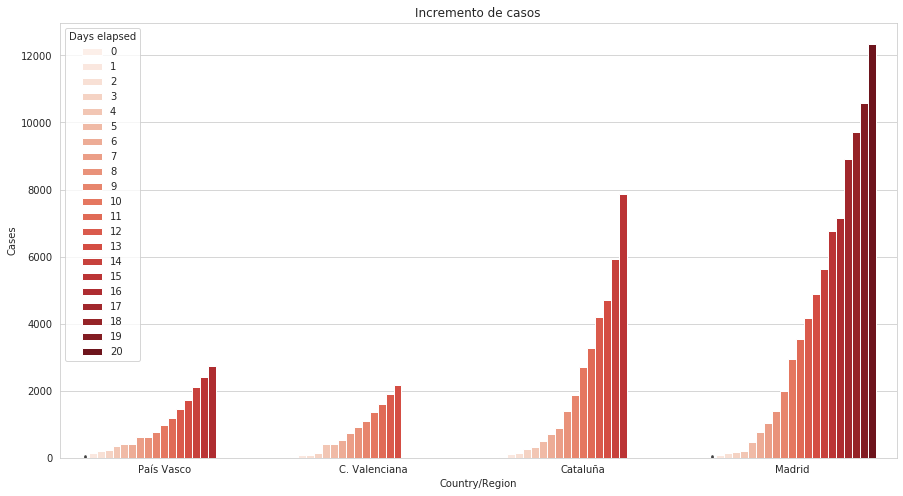

In [53]:
# Plot the number of cases  by days elapsed 
fig_size = (15,8)
fig, ax = plt.subplots(figsize=fig_size)
sns.barplot(x="Country/Region", y="Cases", data=spain_cases_aux,hue='Days elapsed',palette='Reds')
ax.set_title('Incremento de casos')

Text(0.5, 1.0, 'Numero de casos nuevos')

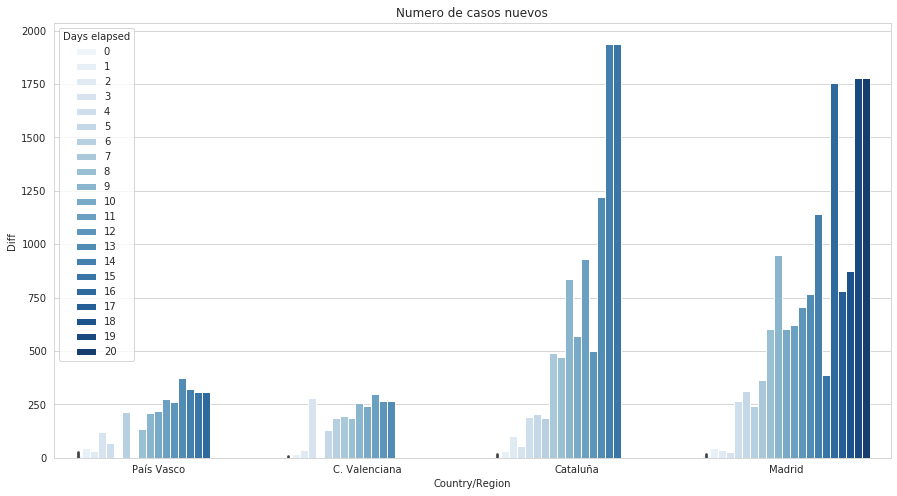

In [54]:
spain_cases_aux['Diff'] = 0
for autonomy in autonomies:
    aux = np.diff(spain_cases_aux[spain_cases_aux['Country/Region']==autonomy]['Cases'].values)
    val = aux[-1]
    spain_cases_aux['Diff'][spain_cases_aux['Country/Region']==autonomy] = (np.append(aux,val))    


# Plot the number of cases DAY BY DAY
fig_size = (15,8)
fig, ax = plt.subplots(figsize=fig_size)
sns.barplot(x="Country/Region", y="Diff", data=spain_cases_aux,hue='Days elapsed',palette='Blues')
ax.set_title('Numero de casos nuevos')

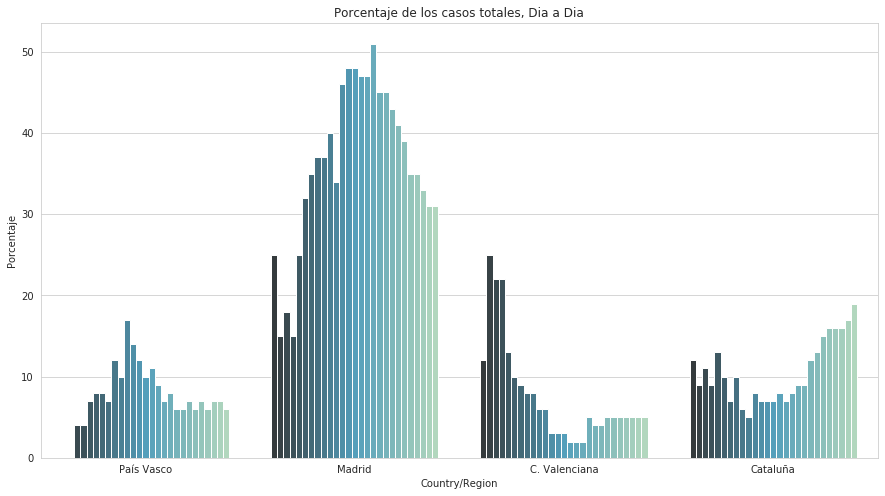

In [97]:
spain_cases['Aux'] = spain_cases['Year']+spain_cases['Month']+spain_cases['Day']
spain_cases = spain_cases.sort_values(by=['Aux'])
spain_cases['Porcentaje'] = 0
for day in spain_cases['Aux'].unique():
    values = spain_cases['Cases'][(spain_cases['Aux']==day)].values
    total = spain_cases['Cases'][(spain_cases['Aux']==day) & (spain_cases['Country/Region'] == 'Total')].values   
    spain_cases['Porcentaje'][(spain_cases['Aux']==day)] = 100*values/total

spain_cases_aux = spain_cases[spain_cases['Country/Region'].isin(autonomies)]
# Plot the number of cases DAY BY DAY
fig_size = (15,8)
fig, ax = plt.subplots(figsize=fig_size)
sns.barplot(x="Country/Region", y="Porcentaje", data=spain_cases_aux,hue='Aux',palette='GnBu_d')
ax.set_title('Porcentaje de los casos totales, Dia a Dia')
ax.get_legend().remove()

## Fallecidos España

In [112]:
spain_cases=pd.read_csv('https://raw.githubusercontent.com/datadista/datasets/master/COVID%2019/ccaa_covid19_fallecidos.csv')
spain_cases = spain_cases.drop(columns=['cod_ine'])
spain_cases = spain_cases.melt(id_vars='CCAA',value_name='Cases',var_name='Date')
spain_cases = spain_cases.rename(columns={'CCAA':'Country/Region'}) 
date = spain_cases['Date'].str.split('-', n = 2, expand = True) 
spain_cases['Year'] = date[0]
spain_cases['Month'] = date[1]
spain_cases['Day'] = date[2]
spain_cases = spain_cases.sort_values(by=['Cases'])
#spain_cases = spain_cases.drop(columns=['Date'])

Text(0.5, 1.0, 'Fallecidos por comunidades. Dia 0:10')

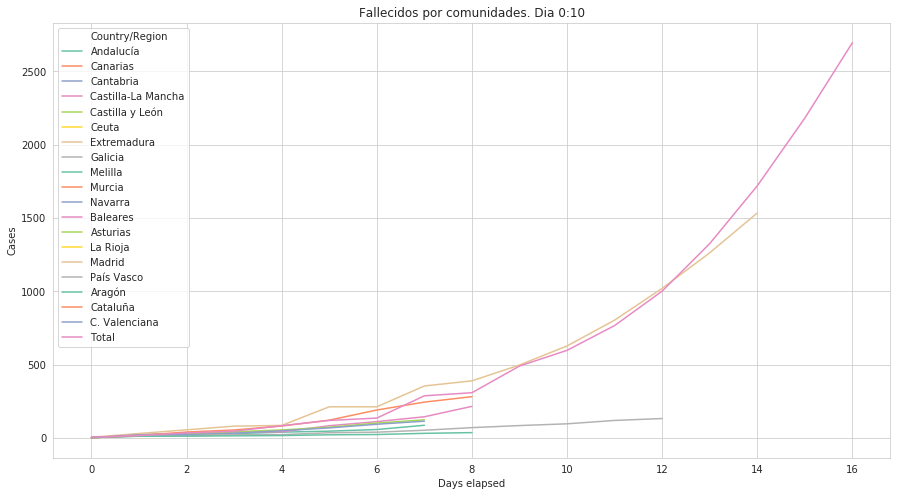

In [114]:
day0 = 10
autonomies = spain_cases['Country/Region'].unique()
spain_cases['Days elapsed'] = 0
for autonomy in autonomies:
    days_elapsed = (len(spain_cases[(spain_cases['Cases']>day0) & (spain_cases['Country/Region']==autonomy)]))
    spain_cases['Days elapsed'][(spain_cases['Cases']>day0) & (spain_cases['Country/Region']==autonomy)]=np.arange(0,days_elapsed)



sns.set_style("whitegrid")
fig_size = (15,8)
fig, ax = plt.subplots(figsize=fig_size)
ax=sns.lineplot(x="Days elapsed", y="Cases",
             hue="Country/Region",
             data=spain_cases, palette='Set2', markers=True)
ax.set_title('Fallecidos por comunidades. Dia 0:' + str(day0))

Text(0.5, 1.0, 'Fallecidos por comunidades más afectadas. Dia 0:10')

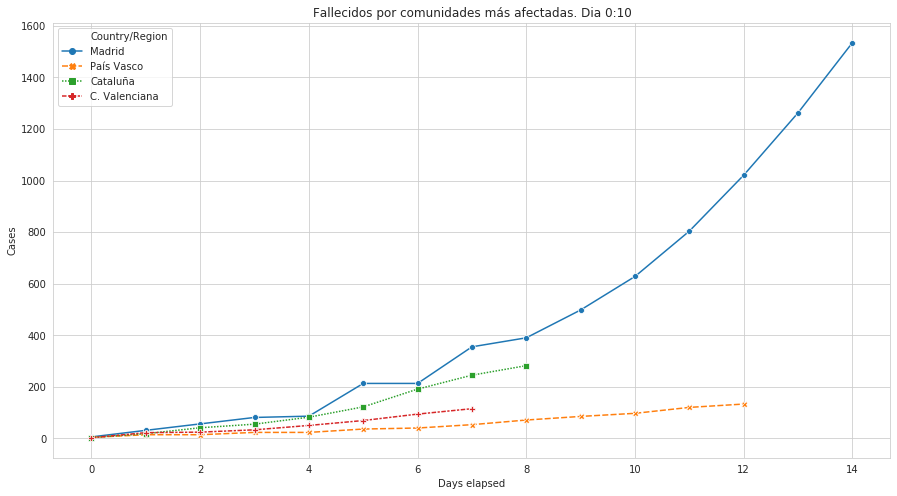

In [115]:
day0 = 10
autonomies = ['Madrid','Cataluña','País Vasco','C. Valenciana']
spain_cases_aux = spain_cases[spain_cases['Country/Region'].isin(autonomies)]
spain_cases_aux['Days elapsed'] = 0
for autonomy in autonomies:
    days_elapsed = (len(spain_cases_aux[(spain_cases_aux['Cases']>day0) & (spain_cases_aux['Country/Region']==autonomy)]))
    spain_cases_aux['Days elapsed'][(spain_cases_aux['Cases']>day0) & (spain_cases_aux['Country/Region']==autonomy)]=np.arange(0,days_elapsed)



sns.set_style("whitegrid")
fig_size = (15,8)
fig, ax = plt.subplots(figsize=fig_size)
ax=sns.lineplot(x="Days elapsed", y="Cases",
             hue="Country/Region",
             data=spain_cases_aux, palette='tab10', markers=True, style = 'Country/Region')
ax.set_title('Fallecidos por comunidades más afectadas. Dia 0:' + str(day0))

Text(0.5, 1.0, 'Incremento de Fallecidos')

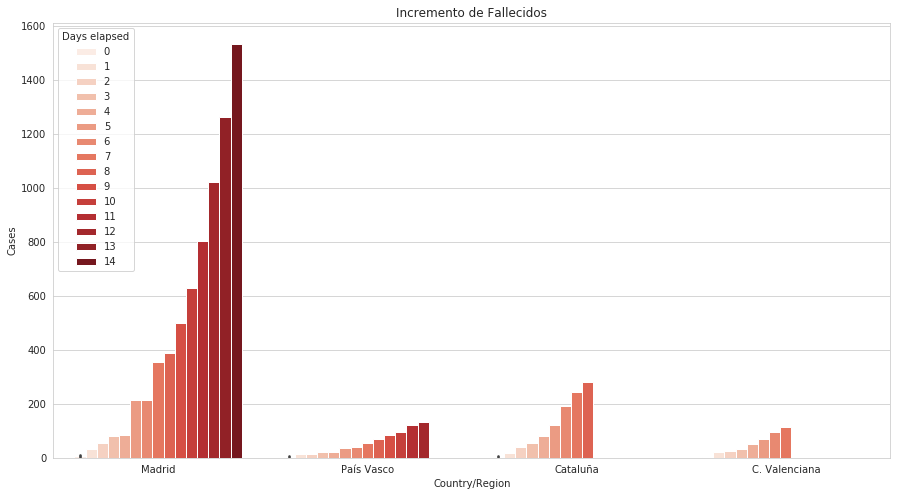

In [116]:
# Plot the number of cases  by days elapsed 
fig_size = (15,8)
fig, ax = plt.subplots(figsize=fig_size)
sns.barplot(x="Country/Region", y="Cases", data=spain_cases_aux,hue='Days elapsed',palette='Reds')
ax.set_title('Incremento de Fallecidos')

Text(0.5, 1.0, 'Numero de fallecidos nuevos')

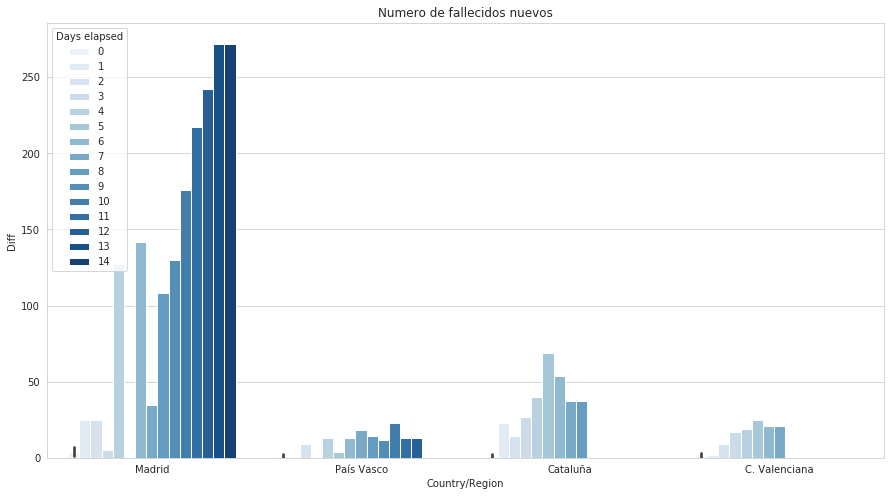

In [117]:
spain_cases_aux['Diff'] = 0
for autonomy in autonomies:
    aux = np.diff(spain_cases_aux[spain_cases_aux['Country/Region']==autonomy]['Cases'].values)
    val = aux[-1]
    spain_cases_aux['Diff'][spain_cases_aux['Country/Region']==autonomy] = (np.append(aux,val))    


# Plot the number of cases DAY BY DAY
fig_size = (15,8)
fig, ax = plt.subplots(figsize=fig_size)
sns.barplot(x="Country/Region", y="Diff", data=spain_cases_aux,hue='Days elapsed',palette='Blues')
ax.set_title('Numero de fallecidos nuevos')

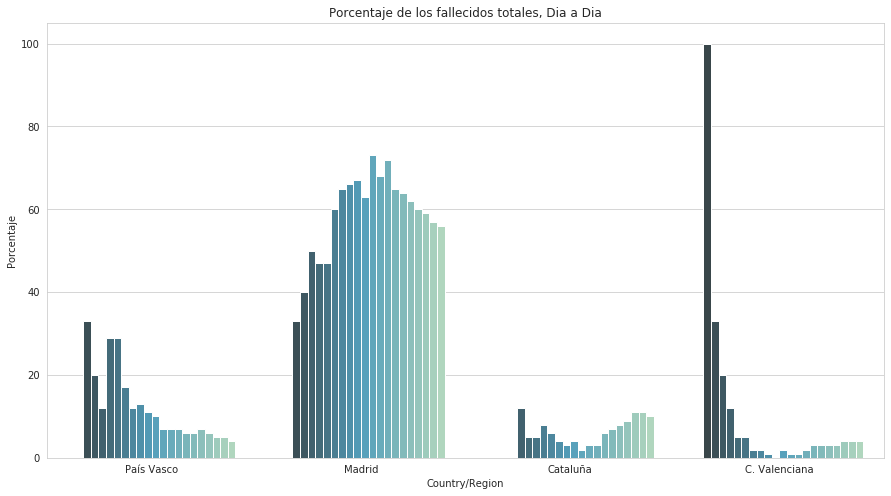

In [120]:
spain_cases['Aux'] = spain_cases['Year']+spain_cases['Month']+spain_cases['Day']
spain_cases = spain_cases.sort_values(by=['Aux'])
spain_cases['Porcentaje'] = 0
for day in spain_cases['Aux'].unique():    
    values = spain_cases['Cases'][(spain_cases['Aux']==day)].values
    total = spain_cases['Cases'][(spain_cases['Aux']==day) & (spain_cases['Country/Region'] == 'Total')].values   
    if total!=0:
        spain_cases['Porcentaje'][(spain_cases['Aux']==day)] = 100*values/total

spain_cases_aux = spain_cases[spain_cases['Country/Region'].isin(autonomies)]
# Plot the number of cases DAY BY DAY
fig_size = (15,8)
fig, ax = plt.subplots(figsize=fig_size)
sns.barplot(x="Country/Region", y="Porcentaje", data=spain_cases_aux,hue='Aux',palette='GnBu_d')
ax.set_title('Porcentaje de los fallecidos totales, Dia a Dia')
ax.get_legend().remove()